In [4]:
import sys
import copy
sys.path.insert(0, "..")
from classes.calculators.lennardjones import LennardJones1 as LennardJones
from classes.atoms import Atom_Collection, Atom, create_atom_col_copies
from classes.optimizers.metropol import Metropol
from classes.optimizers.random_struct_search import Line_searcher1 as Line_searcher
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
plt.rc('animation', html='jshtml')

In [5]:
def random_inits(N, x_min=-4.0, x_max=4.0, y_min=-4.0, y_max=4.0):
    ns = np.random.rand(N,2)
    ns[:,0]*=(x_max-x_min)
    ns[:,0]+=x_min
    ns[:,1]*=(y_max-y_min)
    ns[:,1]+=y_min
    return ns

def create_atom_col(N_atoms, grid_size, fixed_col="C1", non_fixed_col="C0"):
    atom_list = []
    colors = [fixed_col] + [non_fixed_col for i in range(N_atoms-1)]
    init_pos = random_inits(N=N_atoms-1, x_min=grid_size[0], x_max=grid_size[1], y_min=grid_size[0], y_max=grid_size[1])
    init_pos_fixed = np.array([0.0,0.0])
    new_arr = np.insert(init_pos,0, init_pos_fixed).reshape(N_atoms, 2)
    for pos, col in zip(new_arr, colors):
        atom = Atom(pos, color=col)
        atom_list.append(atom)
    atom_col = Atom_Collection(atomlist=atom_list)
    atom_col.freeze_atoms(indices=[0])
    return atom_col

# $N=5$:  Atomic cluster
## Before line-search:

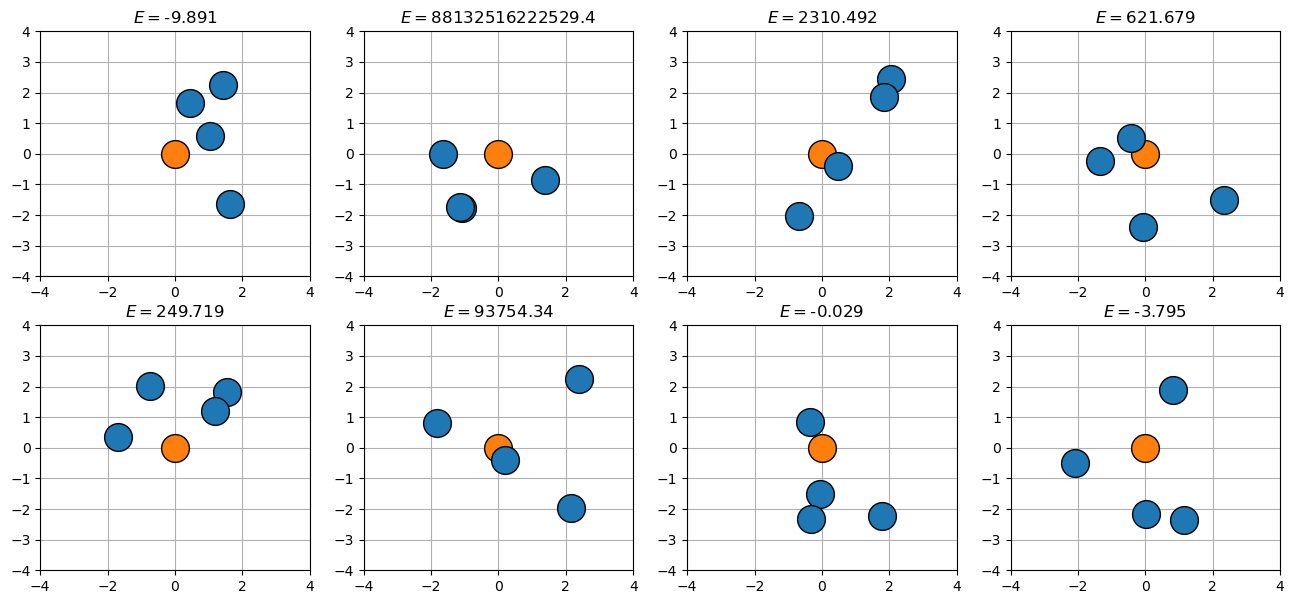

In [6]:
fig, axs = plt.subplots(2,4, figsize=(16,7))
atom_cols = []
sizes = [20.0 for i in range(5)]
for ax in axs.flatten():
    ax.grid()
    ax.set_xlim([-4,4])
    ax.set_ylim([-4,4])
    atom_col = create_atom_col(5, [-2.5,2.5])
    atom_col.set_sizes(new_sizes=sizes)
    atom_col.calculator = LennardJones()
    atom_col.plot(ax=ax)
    atom_cols.append(atom_col)
    ax.set_title(rf"$E=${atom_col.get_potential_energy().round(3)}")

## After Line-search

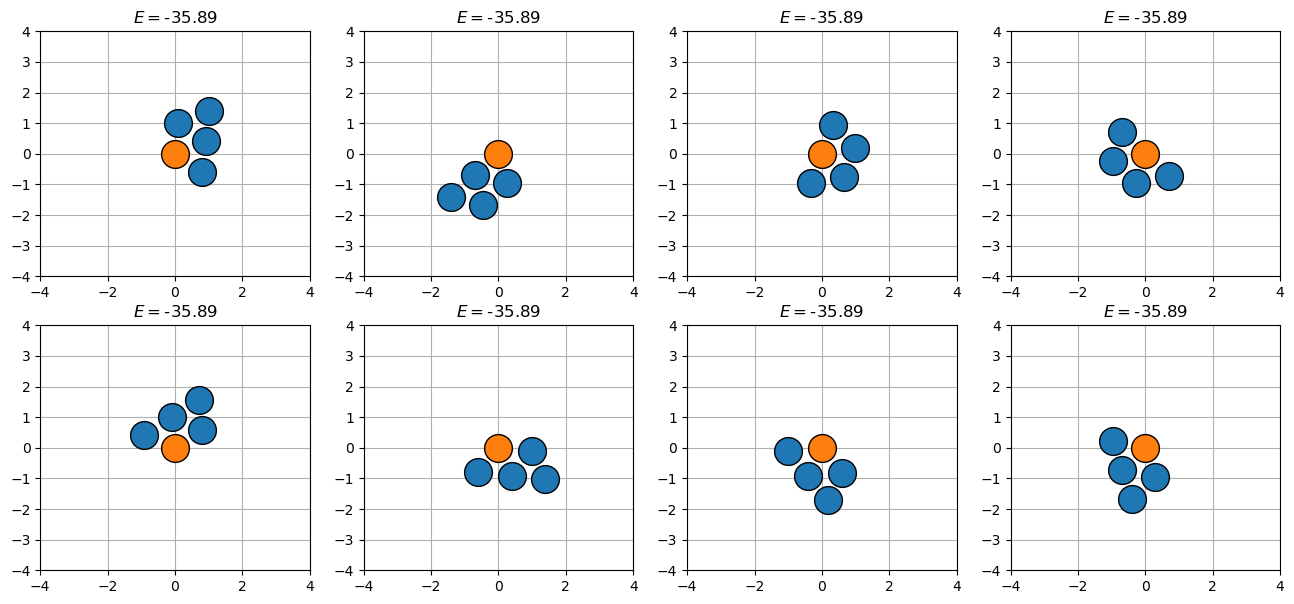

In [7]:
opt_cols = []
for atom_col in atom_cols:
    optimizer = Line_searcher(atom_col=atom_col)
    positions, forces = optimizer.run(N_max=3000)
    opt_cols.append(create_atom_col_copies(atom_col=atom_col, positions=positions, velocities=np.zeros(shape=(positions.shape)))[0])
fig, axs = plt.subplots(2,4, figsize=(16,7))
sizes = [25.0 for i in range(5)]
for ax, opt_col in zip(axs.flatten(), opt_cols):
    ax.grid()
    ax.set_xlim([-4,4])
    ax.set_ylim([-4,4])
    opt_col.plot(ax=ax)
    ax.set_title(rf"$E=${opt_col.get_potential_energy().round(3)}")

# $N=7$:  Atomic cluster
## Before line-search:

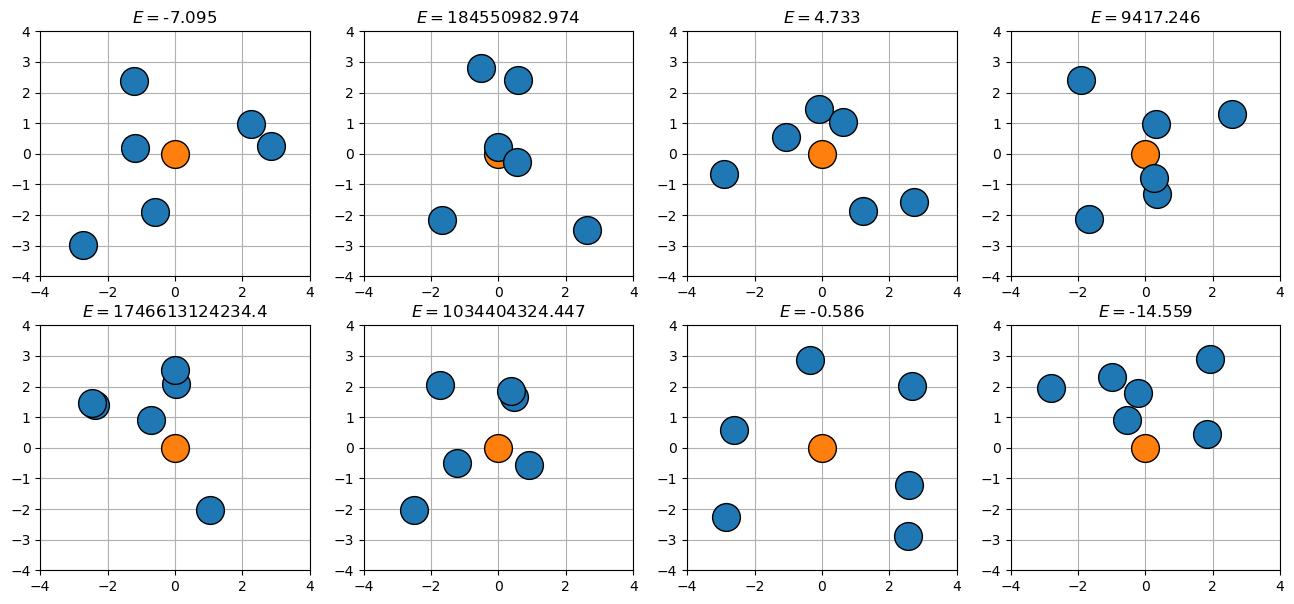

In [8]:
fig, axs = plt.subplots(2,4, figsize=(16,7))
atom_cols = []
N_atoms = 7
sizes = [20.0 for i in range(N_atoms)]
for ax in axs.flatten():
    ax.grid()
    ax.set_xlim([-4,4])
    ax.set_ylim([-4,4])
    atom_col = create_atom_col(N_atoms=N_atoms, grid_size=[-3.0,3.0])
    atom_col.set_sizes(new_sizes=sizes)
    atom_col.calculator = LennardJones()
    atom_col.plot(ax=ax)
    atom_cols.append(atom_col)
    ax.set_title(rf"$E=${atom_col.get_potential_energy().round(3)}")

## After line-search:

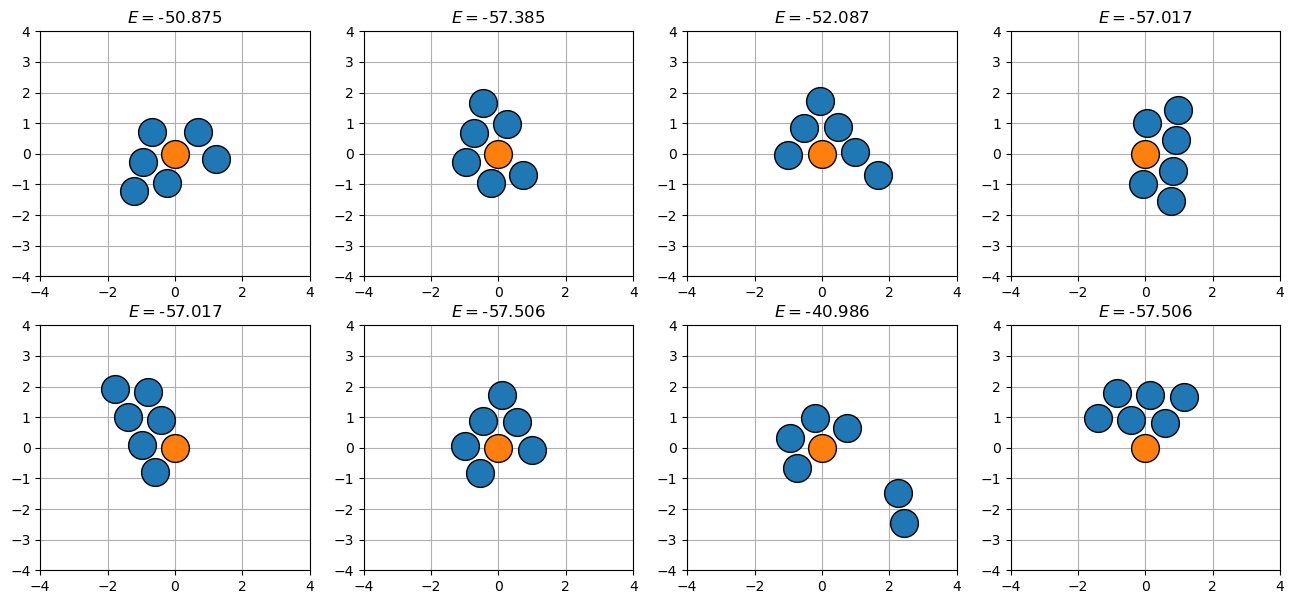

In [9]:
opt_cols = []
for atom_col in atom_cols:
    optimizer = Line_searcher(atom_col=atom_col)
    positions, forces = optimizer.run(N_max=3000)
    opt_cols.append(create_atom_col_copies(atom_col=atom_col, positions=positions, velocities=np.zeros(shape=(positions.shape)))[0])
fig, axs = plt.subplots(2,4, figsize=(16,7))
sizes = [25.0 for i in range(5)]
for ax, opt_col in zip(axs.flatten(), opt_cols):
    ax.grid()
    ax.set_xlim([-4,4])
    ax.set_ylim([-4,4])
    opt_col.plot(ax=ax)
    ax.set_title(rf"$E=${opt_col.get_potential_energy().round(3)}")

# $N=17$:  Atomic cluster
## Before line-search:

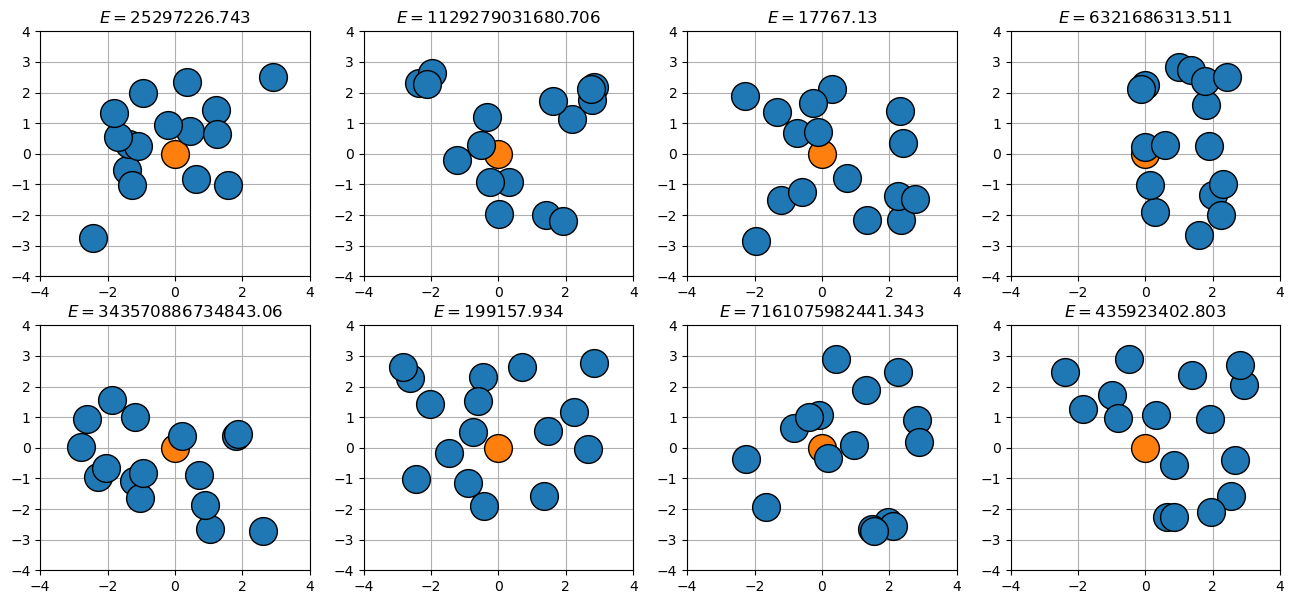

In [10]:
fig, axs = plt.subplots(2,4, figsize=(16,7))
atom_cols = []
N_atoms = 17
sizes = [20.0 for i in range(N_atoms)]
for ax in axs.flatten():
    ax.grid()
    ax.set_xlim([-4,4])
    ax.set_ylim([-4,4])
    atom_col = create_atom_col(N_atoms=N_atoms, grid_size=[-3.0,3.0])
    atom_col.set_sizes(new_sizes=sizes)
    atom_col.calculator = LennardJones()
    atom_col.plot(ax=ax)
    atom_cols.append(atom_col)
    ax.set_title(rf"$E=${atom_col.get_potential_energy().round(3)}")

## After Line-search

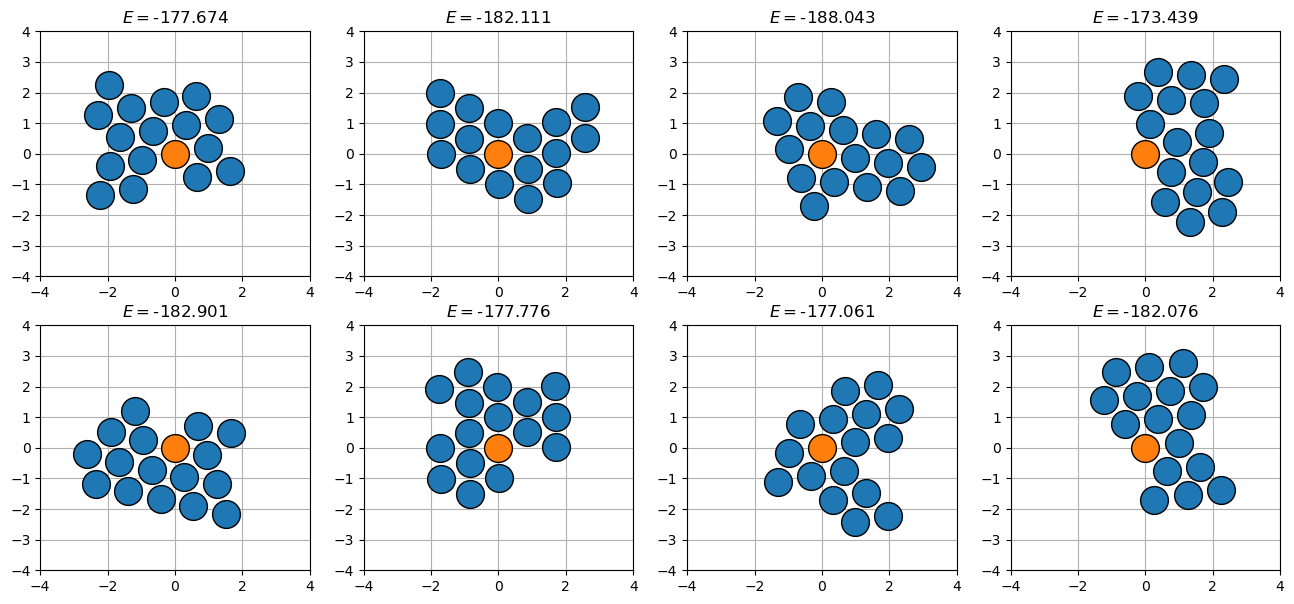

In [11]:
opt_cols = []
for atom_col in atom_cols:
    optimizer = Line_searcher(atom_col=atom_col)
    positions, forces = optimizer.run(N_max=3000)
    opt_cols.append(create_atom_col_copies(atom_col=atom_col, positions=positions, velocities=np.zeros(shape=(positions.shape)))[0])
fig, axs = plt.subplots(2,4, figsize=(16,7))
sizes = [25.0 for i in range(5)]
for ax, opt_col in zip(axs.flatten(), opt_cols):
    ax.grid()
    ax.set_xlim([-4,4])
    ax.set_ylim([-4,4])
    opt_col.plot(ax=ax)
    ax.set_title(rf"$E=${opt_col.get_potential_energy().round(3)}")